In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
df= pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

<AxesSubplot:>

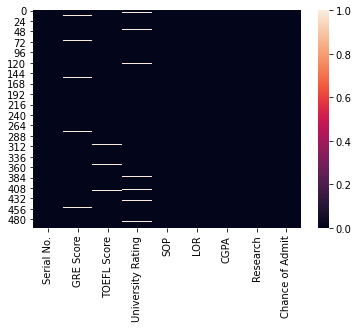

In [4]:
sns.heatmap(df.isnull())

In [5]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [6]:
x=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']

In [7]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


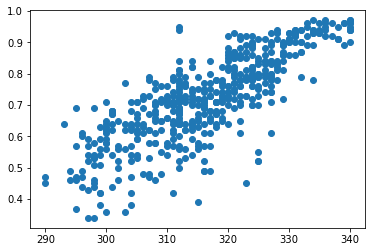

In [8]:
plt.scatter(df['GRE Score'],y)

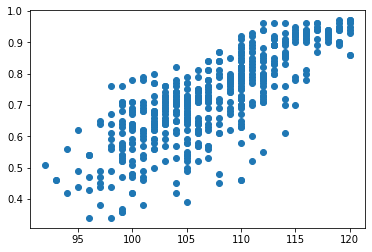

In [9]:
plt.scatter(df['TOEFL Score'],y)

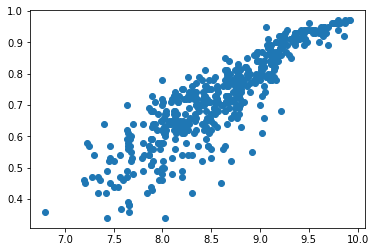

In [10]:
plt.scatter(df['CGPA'],y)

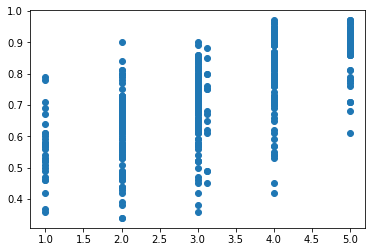

In [11]:
plt.scatter(df['University Rating'],y)

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30, random_state=102)

In [13]:
train_x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
89,316.0,109.0,4.0,4.5,3.5,8.76,1
9,323.0,108.0,3.0,3.5,3.0,8.60,0
430,311.0,104.0,3.0,4.0,3.5,8.13,1
469,326.0,114.0,4.0,4.0,3.5,9.16,1
178,309.0,108.0,3.0,2.5,3.0,8.12,0


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [15]:
from sklearn.metrics import r2_score
score= r2_score(model.predict(test_x),test_y)
score

0.8501431787501457

In [17]:
filename = 'finalized_model.pickle'
pickle.dump(model, open(filename, 'wb'))

In [18]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.981906319606733
